In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_train.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X =  df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [10]:
X_test

,Age,Fare,Age_imputed
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0
...,...,...,...
433,17.0,7.1250,17.0
773,NaN,7.2250,NaN
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0


In [19]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age_imputed"].isnull().sum()).values

/home/deependra/.local/lib/python3.6/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [20]:
X_test["Age_imputed"][X_test["Age_imputed"].isnull()] = X_test["Age"].dropna().sample(X_test["Age_imputed"].isnull().sum()).values

In [21]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

In [22]:
X_test.isnull().sum()

Age            37
Fare            0
Age_imputed     0
dtype: int64

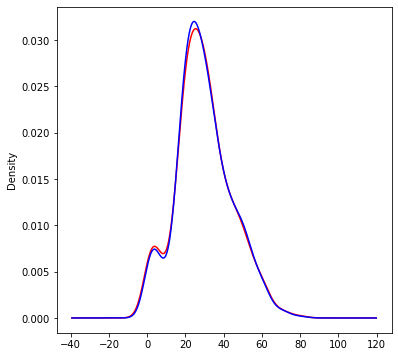

In [25]:
plt.figure(figsize=(6,6))

X_train["Age"].plot(kind = "kde", color = "red")
X_train["Age_imputed"].plot(kind = "kde", color = "blue")

plt.show()

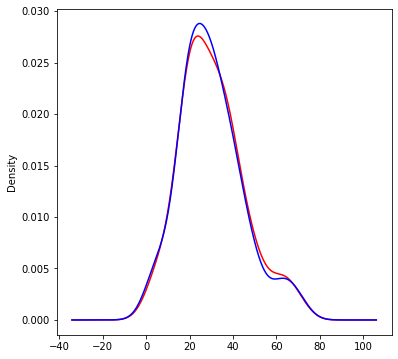

In [26]:
plt.figure(figsize=(6,6))

X_test["Age"].plot(kind = "kde", color = "red")
X_test["Age_imputed"].plot(kind = "kde", color = "blue")

plt.show()

/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


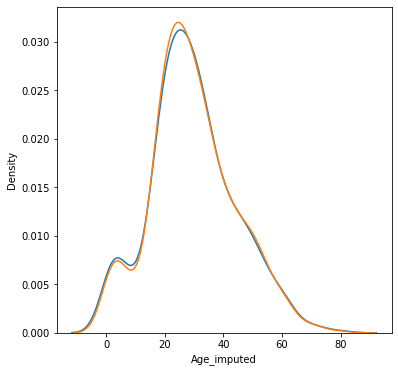

In [27]:
plt.figure(figsize=(6,6))

sns.distplot(X_train["Age"], label = "Original", hist = False)
sns.distplot(X_train["Age_imputed"], label = "Imputed", hist = False)

plt.show()

In [28]:
print("Original Age variance",X_train["Age"].var())
print("Original Age variance",X_train["Age_imputed"].var())

Original Age variance 210.2517072477435
Original Age variance 205.32266034466414


In [29]:
X_train[["Fare","Age","Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,54.995184
Age,71.580633,210.251707,210.251707
Age_imputed,54.995184,210.251707,205.322660


<AxesSubplot:>

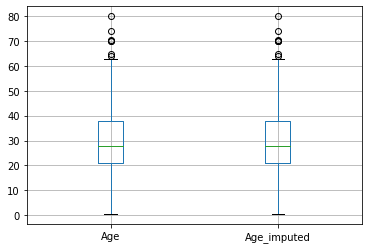

In [30]:
X_train[["Age","Age_imputed"]].boxplot()

In [36]:
sampled_value = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum(),random_state=int(observation["Fare"]))

NameError: name 'observation' is not defined

In [37]:
df1 = pd.read_csv("garage_qual.csv")

In [39]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
df1 = df1[["GarageQual","FireplaceQu","SalePrice"]]

In [42]:
df1

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [43]:
df1.isnull().sum()

GarageQual      81
FireplaceQu    690
SalePrice        0
dtype: int64

In [44]:
X = df1
y = df1["SalePrice"]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]

X_test["GarageQual_imputed"] = X_test["GarageQual"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [47]:
X_train.sample(5)

,GarageQual,FireplaceQu,SalePrice,GarageQual_imputed,FireplaceQu_imputed
21,TA,Gd,139400,TA,Gd
544,TA,Gd,179665,TA,Gd
497,TA,NaN,184000,TA,NaN
331,TA,NaN,139000,TA,NaN
295,TA,NaN,142500,TA,NaN


In [49]:
X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()] = X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu"].isnull().sum()).values
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()] = X_test["FireplaceQu"].dropna().sample(X_test["FireplaceQu"].isnull().sum()).values



X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()] = X_test["GarageQual"].dropna().sample(X_test["GarageQual"].isnull().sum()).values

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [50]:
X_train.isnull().sum()

GarageQual              64
FireplaceQu            547
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [51]:
X_test.isnull().sum()

GarageQual              17
FireplaceQu            143
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [57]:
temp = pd.concat([X_train["GarageQual"].value_counts()/len(X_train["GarageQual"].dropna()),
                  X_train["GarageQual_imputed"].value_counts()/len(X_train)],axis = 1)
temp.columns = ["Original","imputed"]

temp

In [58]:
temp

,Original,imputed
TA,0.951087,0.952055
Fa,0.032609,0.032534
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [59]:
temp1 = pd.concat([X_train["FireplaceQu"].value_counts()/len(X_train["FireplaceQu"].dropna()),
                  X_train["FireplaceQu_imputed"].value_counts()/len(X_train)],axis = 1)
temp1.columns = ["Original","imputed"]

In [60]:
temp1

,Original,imputed
Gd,0.491143,0.494007
TA,0.405797,0.404966
Fa,0.043478,0.042808
Ex,0.033816,0.032534
Po,0.025765,0.025685


/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

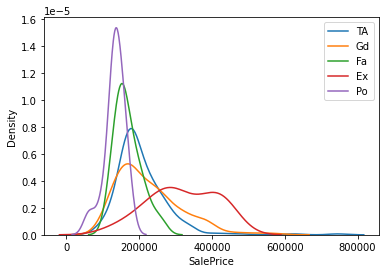

In [66]:
for category in X_train["FireplaceQu"].dropna().unique():
    sns.distplot(X_train[X_train["FireplaceQu"] == category]["SalePrice"],hist = False,label = category)
    plt.legend()
plt.show()


/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

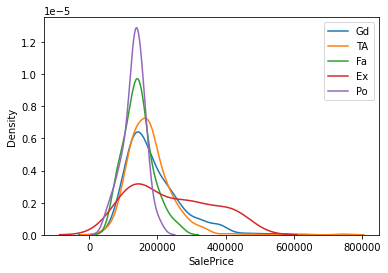

In [65]:
for category in X_train["FireplaceQu_imputed"].dropna().unique():
    sns.distplot(X_train[X_train["FireplaceQu_imputed"] == category]["SalePrice"],hist = False,label = category)
    plt.legend()
plt.show()
